<a href="https://colab.research.google.com/github/koteshvarma2/Data_Science/blob/main/Task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HEART DISEASE PREDICTION DATASET - CORRELATION & COVARIANCE ANALYSIS

1. DATASET INFORMATION:
------------------------------------------------------------
Dataset Shape: (297, 14)
Number of Rows: 297
Number of Columns: 14

Column Names and Data Types:
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
target        int64
dtype: object

2. FIRST 5 ROWS OF DATASET:
------------------------------------------------------------
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.

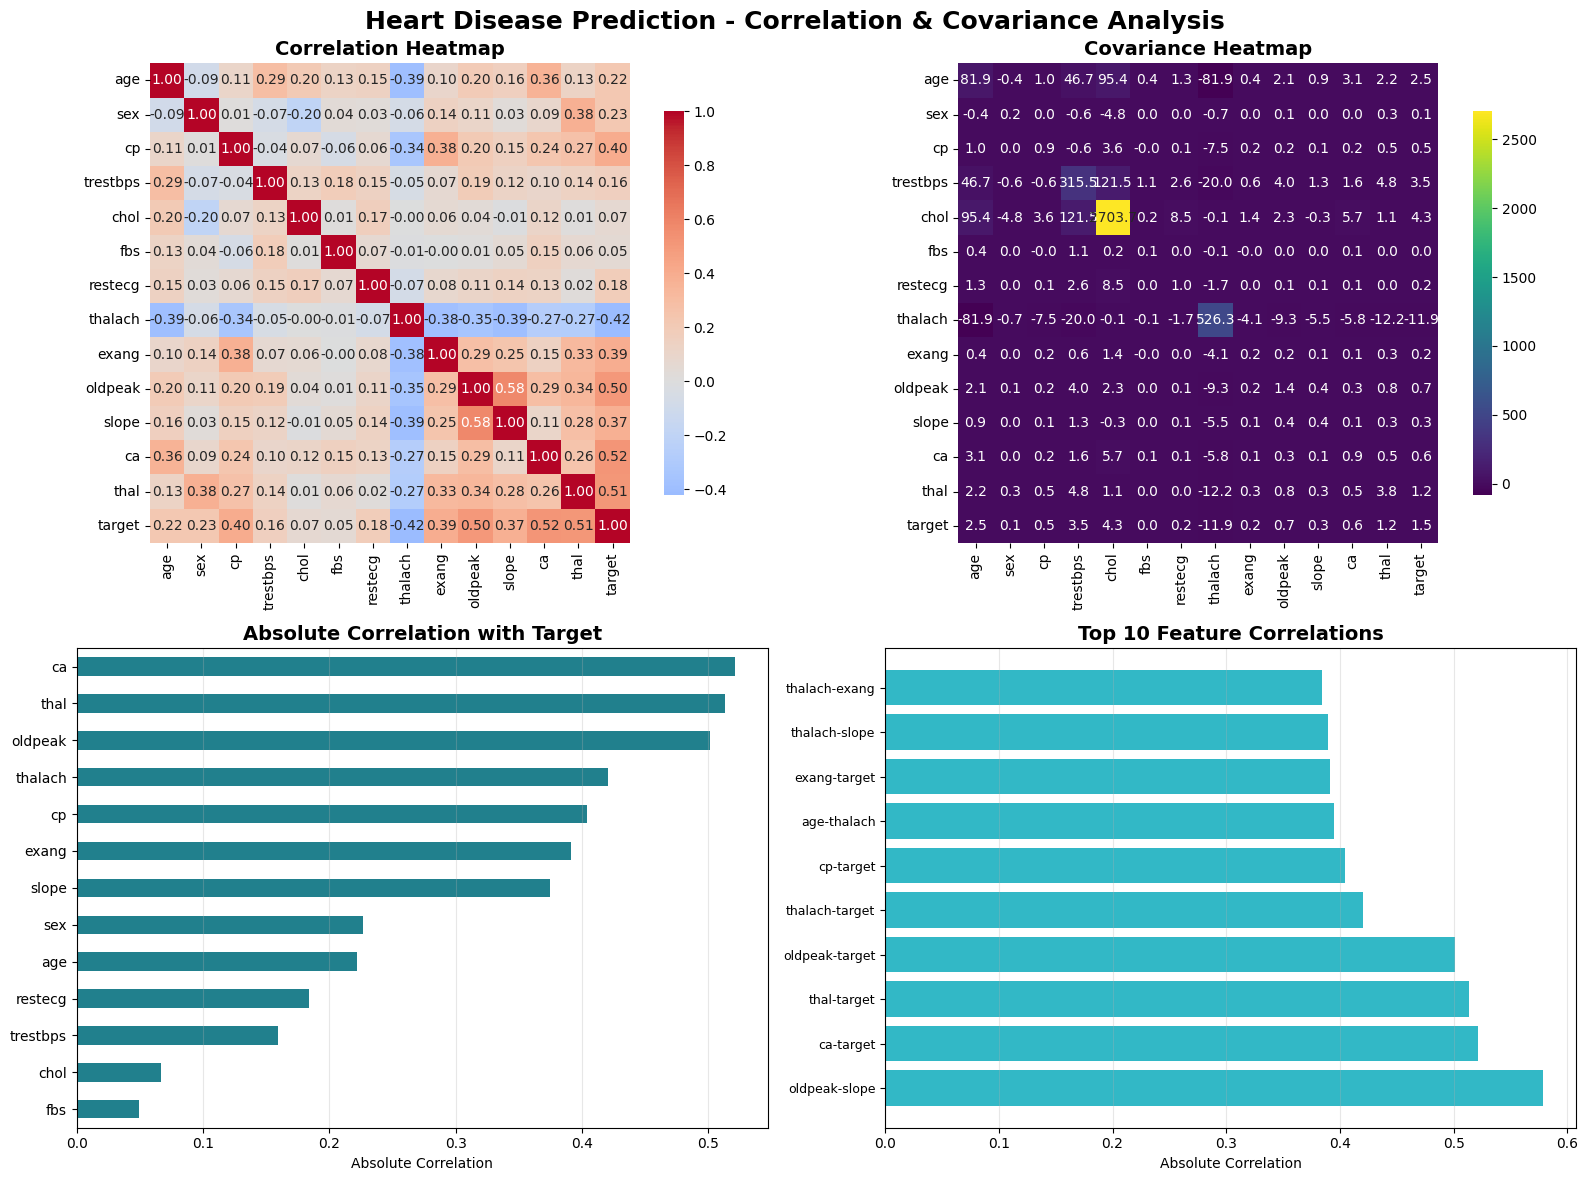


ANALYSIS COMPLETE!


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

df = pd.read_csv(url, names=column_names, na_values='?')

df = df.dropna()

print("=" * 60)
print("HEART DISEASE PREDICTION DATASET - CORRELATION & COVARIANCE ANALYSIS")
print("=" * 60)

print("\n1. DATASET INFORMATION:")
print("-" * 60)
print(f"Dataset Shape: {df.shape}")
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")
print("\nColumn Names and Data Types:")
print(df.dtypes)

print("\n2. FIRST 5 ROWS OF DATASET:")
print("-" * 60)
print(df.head())

print("\n3. DESCRIPTIVE STATISTICS:")
print("-" * 60)
print(df.describe())

print("\n" + "=" * 60)
print("CORRELATION ANALYSIS")
print("=" * 60)

correlation_matrix = df.corr()

print("\n4. CORRELATION MATRIX:")
print("-" * 60)
print(correlation_matrix)

print("\n5. HIGHLY CORRELATED FEATURES (|correlation| > 0.5):")
print("-" * 60)
high_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.5:
            high_corr.append({
                'Feature 1': correlation_matrix.columns[i],
                'Feature 2': correlation_matrix.columns[j],
                'Correlation': correlation_matrix.iloc[i, j]
            })

if high_corr:
    high_corr_df = pd.DataFrame(high_corr)
    print(high_corr_df.to_string(index=False))
else:
    print("No highly correlated features found.")

print("\n6. CORRELATION WITH TARGET VARIABLE (Heart Disease):")
print("-" * 60)
target_corr = correlation_matrix['target'].sort_values(ascending=False)
print(target_corr)

print("\n" + "=" * 60)
print("COVARIANCE ANALYSIS")
print("=" * 60)

covariance_matrix = df.cov()

print("\n7. COVARIANCE MATRIX:")
print("-" * 60)
print(covariance_matrix)

print("\n8. COVARIANCE WITH TARGET VARIABLE:")
print("-" * 60)
target_cov = covariance_matrix['target'].sort_values(ascending=False)
print(target_cov)

print("\n" + "=" * 60)
print("GENERATING VISUALIZATIONS...")
print("=" * 60)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Heart Disease Prediction - Correlation & Covariance Analysis',
             fontsize=18, fontweight='bold')

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', square=True, ax=axes[0, 0], cbar_kws={'shrink': 0.8})
axes[0, 0].set_title('Correlation Heatmap', fontweight='bold', fontsize=14)

sns.heatmap(covariance_matrix, annot=True, cmap='viridis',
            fmt='.1f', square=True, ax=axes[0, 1], cbar_kws={'shrink': 0.8})
axes[0, 1].set_title('Covariance Heatmap', fontweight='bold', fontsize=14)

target_corr_abs = target_corr.drop('target').abs().sort_values(ascending=True)
target_corr_abs.plot(kind='barh', ax=axes[1, 0], color='#21808d')
axes[1, 0].set_title('Absolute Correlation with Target', fontweight='bold', fontsize=14)
axes[1, 0].set_xlabel('Absolute Correlation')
axes[1, 0].grid(axis='x', alpha=0.3)

corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_pairs.append({
            'Pair': f"{correlation_matrix.columns[i]}-{correlation_matrix.columns[j]}",
            'Correlation': abs(correlation_matrix.iloc[i, j])
        })

corr_pairs_df = pd.DataFrame(corr_pairs).nlargest(10, 'Correlation')
axes[1, 1].barh(range(len(corr_pairs_df)), corr_pairs_df['Correlation'], color='#32b8c6')
axes[1, 1].set_yticks(range(len(corr_pairs_df)))
axes[1, 1].set_yticklabels(corr_pairs_df['Pair'], fontsize=9)
axes[1, 1].set_title('Top 10 Feature Correlations', fontweight='bold', fontsize=14)
axes[1, 1].set_xlabel('Absolute Correlation')
axes[1, 1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('correlation_covariance_analysis.png', dpi=300, bbox_inches='tight')
print("\n✓ Visualization saved as 'correlation_covariance_analysis.png'")
plt.show()

print("\n" + "=" * 60)
print("ANALYSIS COMPLETE!")
print("=" * 60)
